Prophet — это метод прогнозирования данных временных рядов на основе AR-модели, в которой учтены годовая, еженедельная и ежедневная сезонности, а также эффекты праздничных дней.Prophet лучше всего работает с временными рядами, которые имеют сильные сезонные эффекты, а данные накоплены за несколько сезонов. Алгоритм устойчив к отсутствующим данным и сдвигам в тренде и обычно хорошо справляется с выбросами.Prophet — библиотека с открытым исходным кодом, выпущенная командой Facebook Core Data Science. Для загрузки метод также доступен в PyPI (через pip install).

Prophet следует API модели sklearn. Это значит, что мы можем пользоваться им и его методами так же, как и в случае с моделями из sklearn: для инициализации модели создаётся экземпляр класса Prophet (myModel = Prophet()), а затем вызываются его методы обучения (.fit()) и прогнозирования (.predict()). Входные данные для методов Prophet должны представлять собой датафрейм с двумя столбцами — DS и Y.

Столбец DS (отметка даты) должен иметь временной формат (DateTime), например ГГГГ-ММ-ДД — для даты или ГГГГ-ММ-ДД ЧЧ:ММ:СС — для отметки времени.
Столбец Y должен быть числовым и представлять измерение, которое мы хотим спрогнозировать.

В качестве примера давайте рассмотрим временной ряд ежедневных просмотров страницы футболиста Пейтона Мэннинга на Wikipedia.
В качестве примера давайте рассмотрим временной ряд ежедневных просмотров страницы футболиста Пейтона Мэннинга на Wikipedia.

In [4]:
import pandas as pd

from prophet import Prophet

url = 'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'

df = pd.read_csv(url)

df.head()

c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
#Обучим модель на датасете:

model = Prophet()
model.fit(df)

11:40:46 - cmdstanpy - INFO - Chain [1] start processing
11:40:47 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
#Для получения прогноза необходимо использовать DataFrame со столбцом DS, содержащим даты, для которых должен быть сделан прогноз.
# Вы можете получить такой DataFrame, используя вспомогательный метод Prophet.make_future_dataframe(), в который необходимо
# передать число дней для совершения прогноза. По умолчанию он также будет включать более ранние даты, поэтому
# мы также увидим, как обучалась модель.

future_df = model.make_future_dataframe(periods=365)

future_df.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


В результате построения прогноза каждому DS будет присвоено прогнозируемое значение (YHAT). Также в прогнозном датафрейме будут два новых столбца ('yhat_lower', 'yhat_upper'), в которых будут находиться верхняя и нижняя границы доверительного интервала:

In [7]:
forecast_df = model.predict(future_df)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.518214,8.908514
3266,2017-01-16,8.531958,7.729214,9.282922
3267,2017-01-17,8.319376,7.540392,9.035057
3268,2017-01-18,8.151991,7.457895,8.883140
3269,2017-01-19,8.163908,7.388527,8.889318


Мы можем отобразить прогноз, вызвав метод Prophet.plot и передав ему полученный датафрейм с результатами прогноза:

c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


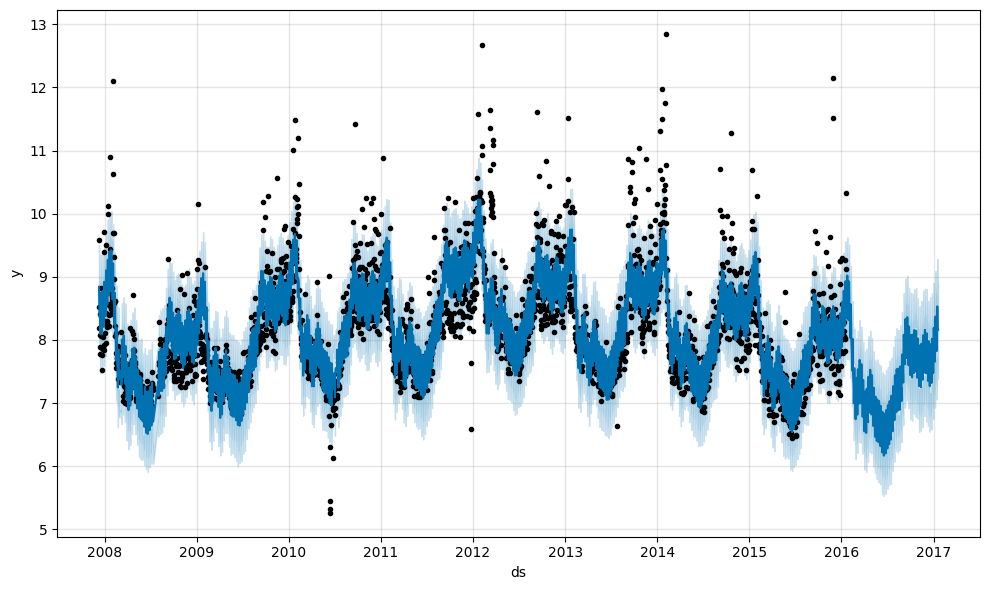

In [8]:
fig = model.plot(forecast_df)

Чтобы увидеть компоненты ряда, можно использовать метод Prophet.plot_components. По умолчанию предоставляются тренд и годовая и недельная сезонность временного ряда.

c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

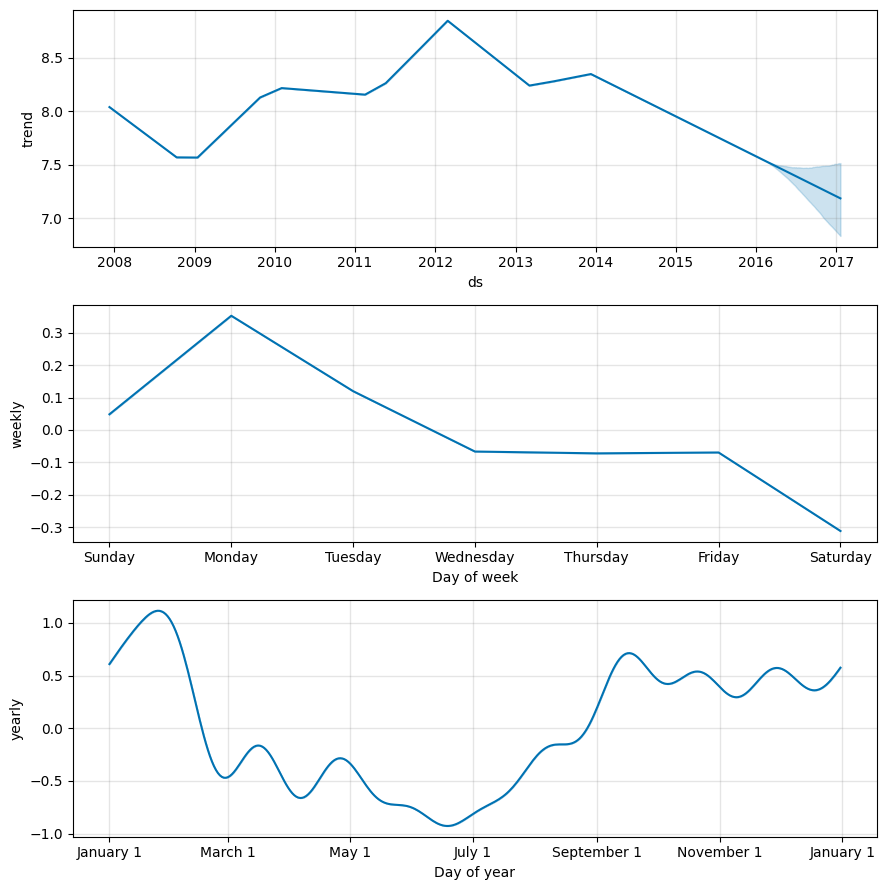

In [9]:
fig = model.plot_components(forecast_df)